In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
from src.models import models
from src.models import model as mainmodel
from src.models import modelConv2d
from src.models import modelineal
from src.models import decoders
from src import loss_func
from src import train
from src import loader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src import optimizer_Factory as of
import Data.genData as genData
from src import custom_plots as cp
from src import Visual_utils as vu
import torchvision
import wandb
import random
import os


os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:2000"
torch.cuda.empty_cache() 
torch.manual_seed(42)

### Numerical SIM

(540,)


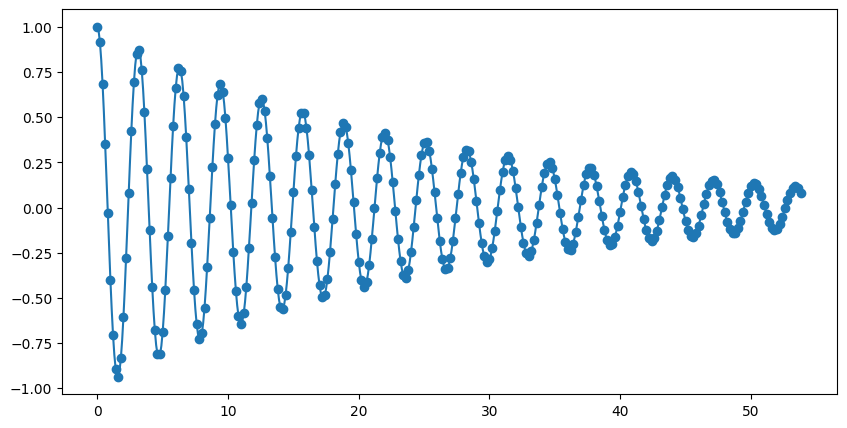

In [42]:
t = np.arange(0,54, 0.1)
sr = 2
a = np.exp(-0.04*t)*np.cos(2*t)
fig = plt.figure( figsize=(10, 5))
plt.plot(t,a)
plt.scatter(t[::sr],a[::sr])

print(a.shape)

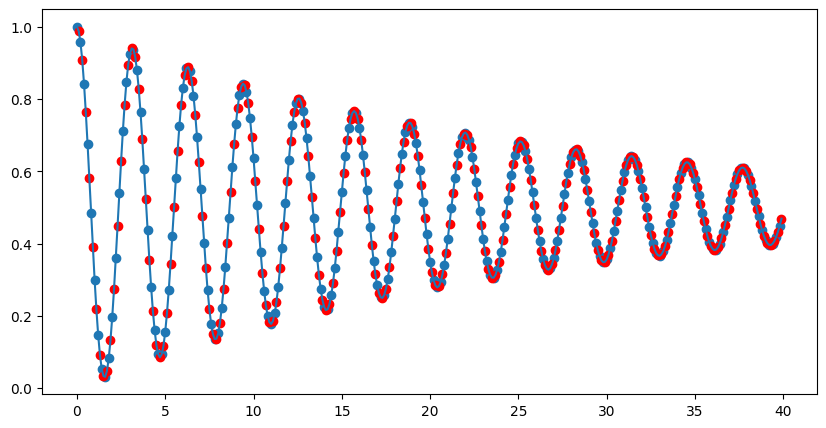

In [30]:
t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)
sr = 2
fig = plt.figure( figsize=(10, 5))
plt.plot(t,a)
plt.scatter(t[::sr],a[::sr])
plt.scatter(t[1::sr],a[1::sr], color='red')	


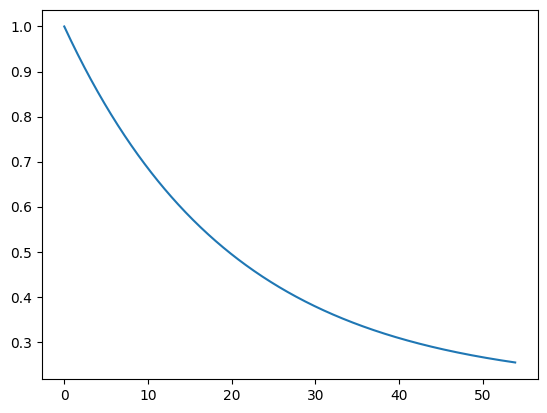

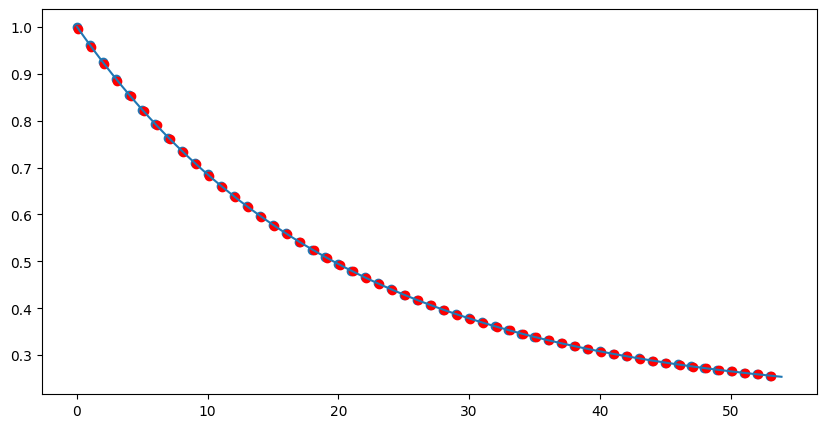

In [35]:
t,a = genData.generateDynamics_1order(max=1.0, min = 0.2, dt = 0.1)
sr = 10
fig = plt.figure( figsize=(10, 5))
plt.plot(t,a)
plt.scatter(t[::sr],a[::sr])
plt.scatter(t[1::sr],a[1::sr], color='red')	


### Generators

In [43]:
#t,a = genData.generateDynamics(max=1.0, min = 0.2, dt = 0.1)#2nd order
t,a = genData.generateDynamics_1order(max=1.0, min = 0.2, dt = 0.1) #1st order
ImageGenerator = genData.create_intensity_image

frames = None
n_samples = t.shape[0]

for i in range(n_samples):
    img = ImageGenerator(a[i]).reshape(1,1,50,50)
    frames = img if frames is None else np.vstack((frames, img))

print(frames.shape)

(540, 1, 50, 50)


In [44]:
def gen_Dataset_npy( frames, sr, n_frames):
    
    dataset = None
    n_samples = frames.shape[0]

    for i in range(n_samples-n_frames*sr ):
        img = frames[i:i+n_frames*sr:sr].reshape(1,n_frames,1,50,50)
        dataset = img if dataset is None else np.vstack((dataset, img))  
        
    return dataset

dataset_intensity = gen_Dataset_npy(frames, 2, 20)
print(dataset_intensity.shape)

(500, 20, 1, 50, 50)


In [49]:
np.save("dataset_intensity", dataset_intensity)

In [ ]:
print(dataset_intensity.shape)


for i in range(10):
    print(a[i*2])
    plt.imshow(dataset_intensity[0,i,0], vmax=1, vmin=0, cmap='gray')
    plt.show()

### motion

(540, 1, 50, 50)


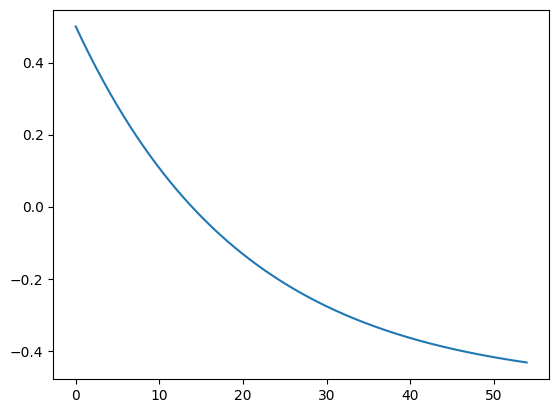

In [36]:
#t,a = genData.generateDynamics(max=0.5, min = -0.5, dt = 0.1) #2nd order
t,a = genData.generateDynamics_1order(max=0.5, min = -0.5, dt = 0.1) #1st order
ImageGenerator = genData.create_pendulum_image

frames = None
n_samples = t.shape[0]

for i in range(n_samples):
    img = ImageGenerator(a[i]).reshape(1,1,50,50)
    frames = img if frames is None else np.vstack((frames, img))

print(frames.shape)

In [37]:
def gen_Dataset_npy( frames, sr, n_frames):
    
    dataset = None
    n_samples = frames.shape[0]

    for i in range(n_samples-n_frames*sr ):
        img = frames[i:i+n_frames*sr:sr].reshape(1,n_frames,1,50,50)
        dataset = img if dataset is None else np.vstack((dataset, img))  
        
    return dataset

dataset_intensity = gen_Dataset_npy(frames, 10, 20)
print(dataset_intensity.shape)

(340, 20, 1, 50, 50)


In [22]:
np.save("dataset_motion_1storder", dataset_intensity)

(340, 20, 1, 50, 50)
0.5


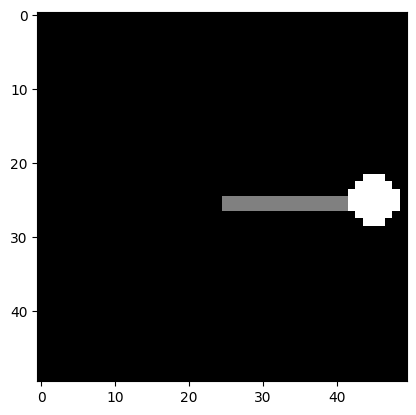

0.4900498337491681


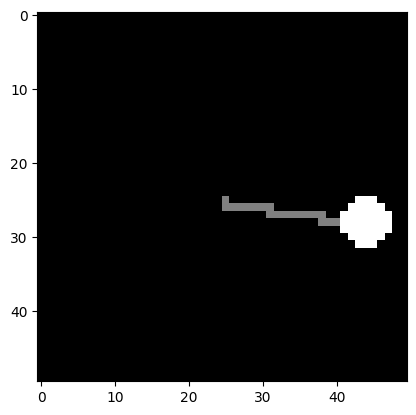

0.48019867330675525


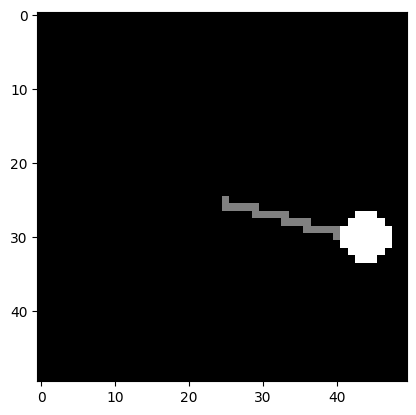

0.47044553354850815


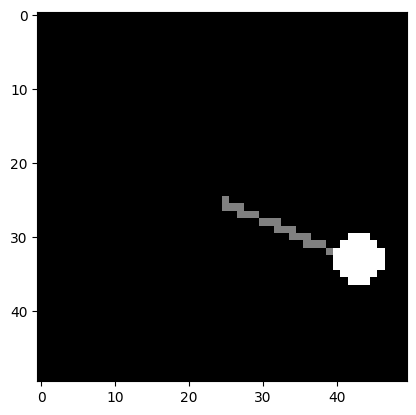

0.4607894391523232


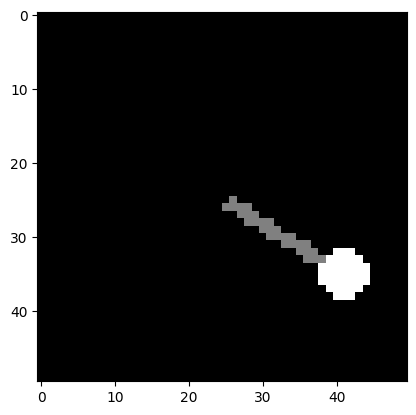

0.451229424500714


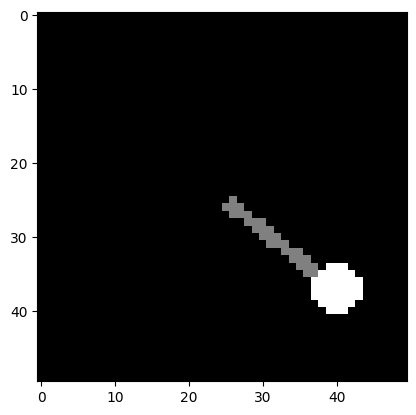

0.4417645335842487


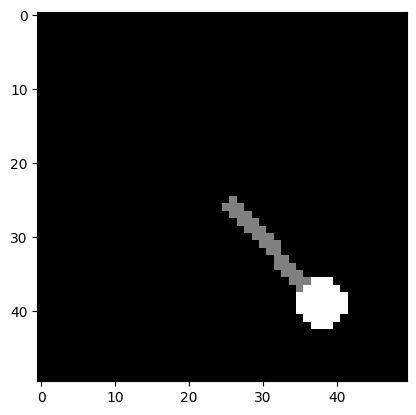

0.4323938199059483


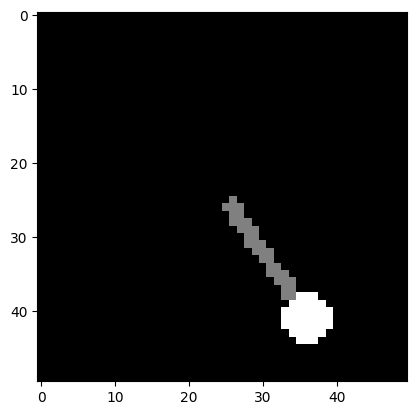

0.42311634638663576


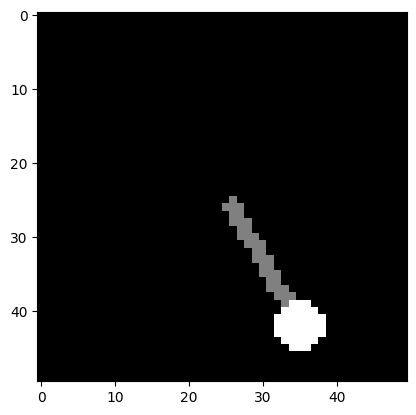

0.4139311852712282


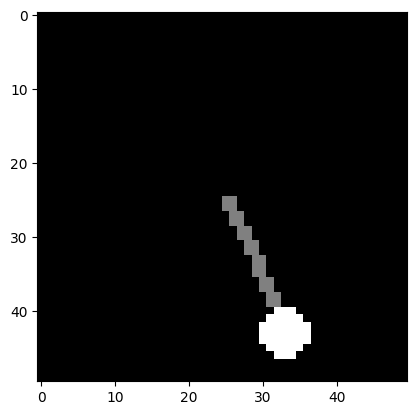

In [38]:
print(dataset_intensity.shape)


for i in range(10):
    print(a[i*2])
    plt.imshow(dataset_intensity[0,i,0], vmax=1, vmin=0, cmap='gray')
    plt.show()

### scale

(540, 1, 50, 50)


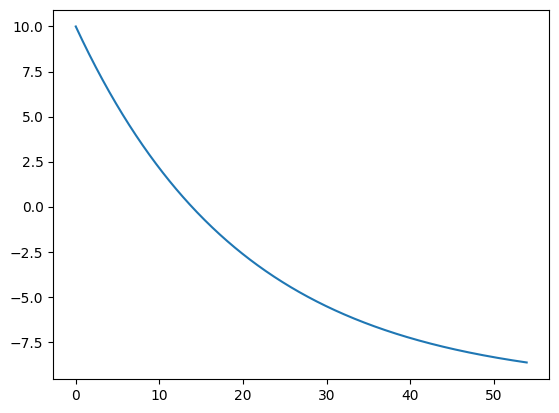

In [28]:
#t,a = genData.generateDynamics(max=10.0, min = -10.0, dt = 0.1)#2nd order
t,a = genData.generateDynamics_1order(max=10.0, min = -10.0, dt = 0.1) #1st order
ImageGenerator = genData.create_half_radius_circle_image

frames = None
n_samples = t.shape[0]

for i in range(n_samples):
    img = ImageGenerator(int(a[i])).reshape(1,1,50,50)
    frames = img if frames is None else np.vstack((frames, img))

print(frames.shape)

In [29]:
def gen_Dataset_npy( frames, sr, n_frames):
    
    dataset = None
    n_samples = frames.shape[0]

    for i in range(n_samples-n_frames*sr ):
        img = frames[i:i+n_frames*sr:sr].reshape(1,n_frames,1,50,50)
        dataset = img if dataset is None else np.vstack((dataset, img))  
        
    return dataset

dataset_intensity = gen_Dataset_npy(frames, 2, 20)
print(dataset_intensity.shape)

(500, 20, 1, 50, 50)


In [30]:
np.save("dataset_Scale_nu_1storder", dataset_intensity)

(500, 20, 1, 50, 50)
10.0


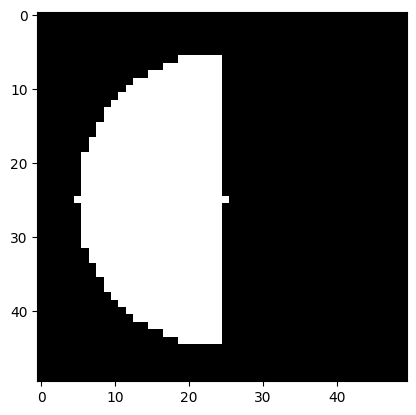

9.800996674983363


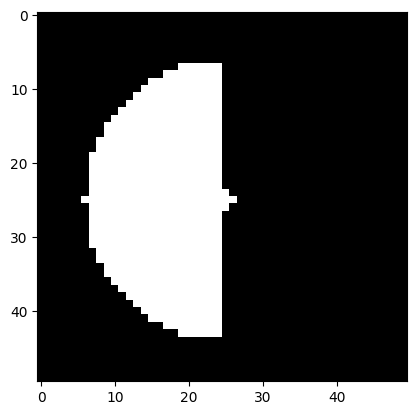

9.603973466135105


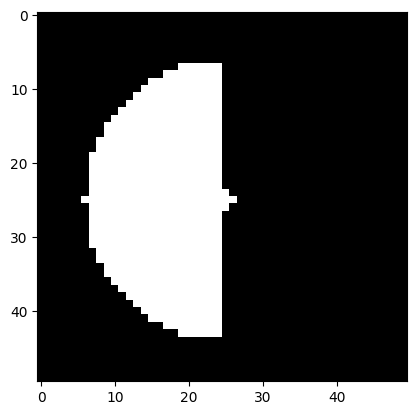

9.408910670970162


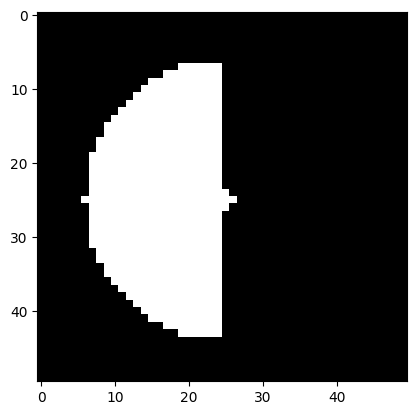

9.215788783046463


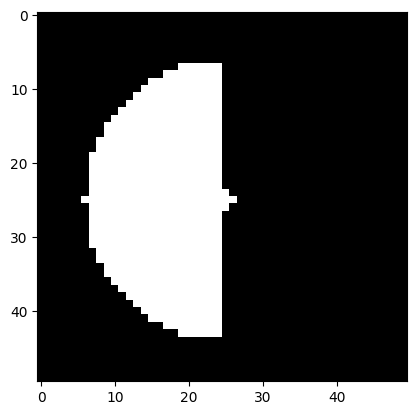

9.024588490014281


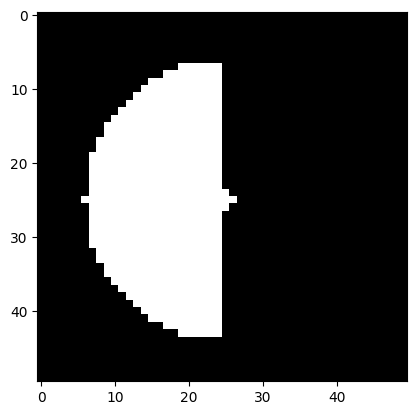

8.835290671684973


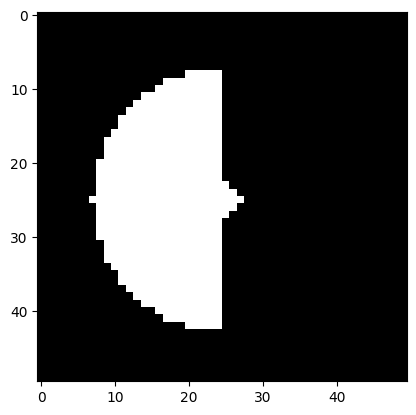

8.647876398118967


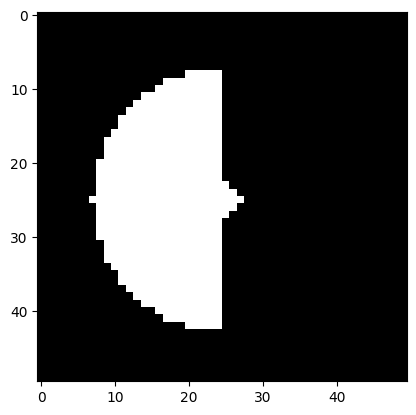

8.462326927732715


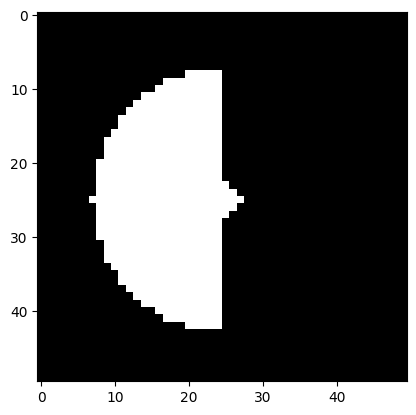

8.278623705424565


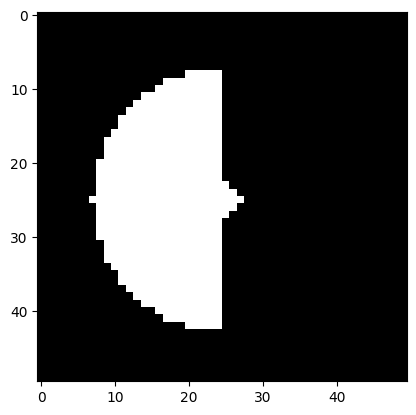

In [31]:
print(dataset_intensity.shape)


for i in range(10):
    print(a[i*2])
    plt.imshow(dataset_intensity[0,i,0], vmax=1, vmin=0, cmap='gray')
    plt.show()

### first order

0.001001001001001001
0.02002002002002002


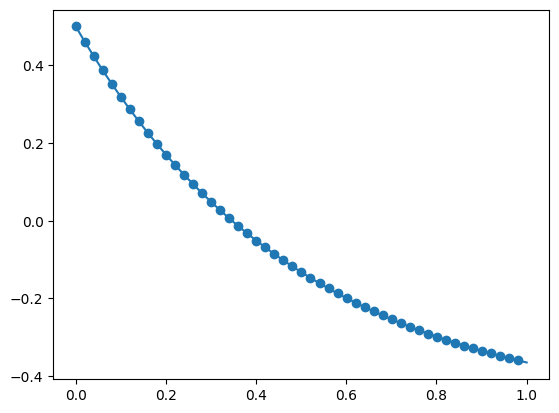

In [174]:
t,a = genData.generateDynamics_1order(max=0.5, min = -0.5, dt = 0.1)
dt = t[1]-t[0]
print(dt)
sr = 20
print(dt*sr)
plt.figure()
plt.plot(t,a)
plt.scatter(t[::sr],a[::sr])
plt.show()

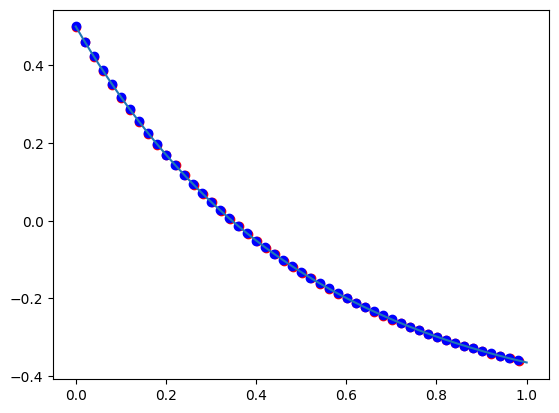

(1000, 1, 50, 50)


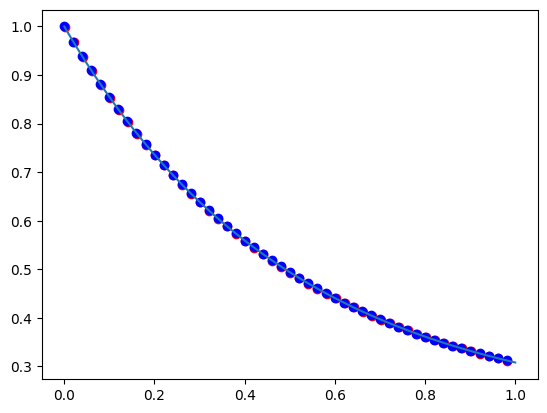

(1000, 1, 50, 50)


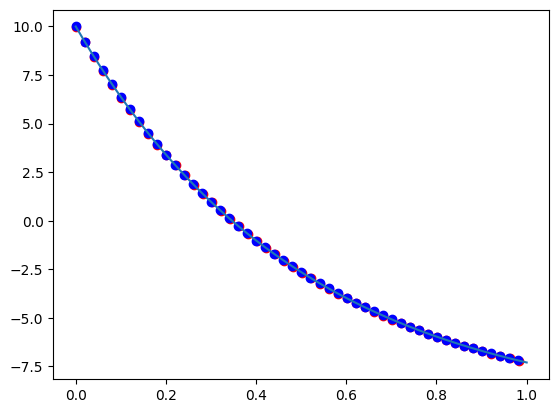

(1000, 1, 50, 50)


In [175]:
def gen_Dataset_npy( frames, sr, n_frames):
    
    dataset = None
    n_samples = frames.shape[0]

    for i in range(n_samples-n_frames*sr ):
        img = frames[i:i+n_frames*sr:sr].reshape(1,n_frames,1,50,50)
        dataset = img if dataset is None else np.vstack((dataset, img))  
        
    return dataset

sr = 20
for dyn in ["motion", "intensity", "scale"]:
#for dyn in ["intensity"]:
    if dyn == "motion":
        t,a = genData.generateDynamics_1order(max=0.5, min = -0.5, dt = 0.5)
        ImageGenerator = genData.create_pendulum_image
    elif dyn == "intensity":
        t,a = genData.generateDynamics_1order(max=1, min=0.2, dt = 0.5)
        ImageGenerator = genData.create_intensity_image
    elif dyn == "scale":
        t,a = genData.generateDynamics_1order(max=10.0, min = -10.0, dt = 0.5)
        ImageGenerator = genData.create_half_radius_circle_image

    frames = None
    n_samples = t.shape[0]    

    ts = t[::sr]
    a_s = a[::sr]

    plt.figure()

    plt.plot(t,a)
    plt.scatter(t[1::sr],a[1::sr], color='red')    
    plt.scatter(t[::sr],a[::sr], color='blue')
    plt.show()
    #break

    for i in range(n_samples):
        img = ImageGenerator(a[i]).reshape(1,1,50,50)
        frames = img if frames is None else np.vstack((frames, img))

    dataset_temp = gen_Dataset_npy(frames, sr, 10)

    print(frames.shape)

    np.save("dataset_"+ dyn +"_1storder", dataset_temp)
    



### Chaos

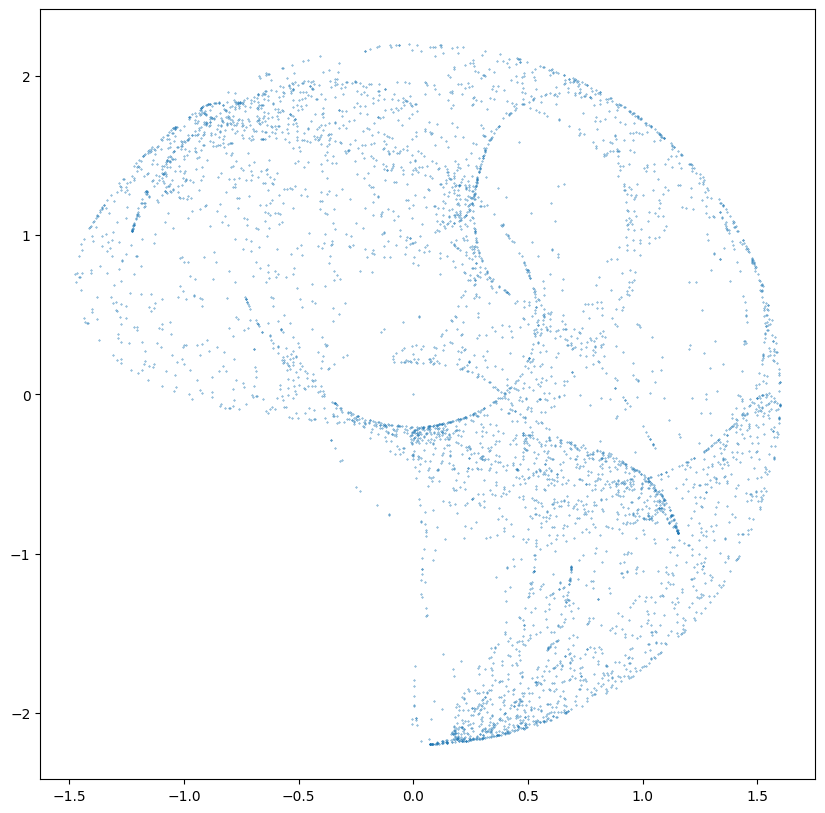

In [133]:
#Clifford Attractor

x = 0
y = 0

a = 2
b = 2
c =  1
d =  -1

a= 1.7
b = 1.7
c = 0.6
d = 1.2

x = [x]
y = [y]

for i in range(5000):
    x.append(np.sin(a*y[i])+c*np.cos(a*x[i]))
    y.append(np.sin(b*x[i])+d*np.cos(b*y[i]))

x = np.array(x)
y = np.array(y)

plt.figure( figsize=(10, 10) , dpi=100)  
plt.scatter(x,y, s=0.1)
#plt.scatter(x[::10],y[::10], s=2, color='red')
plt.show()


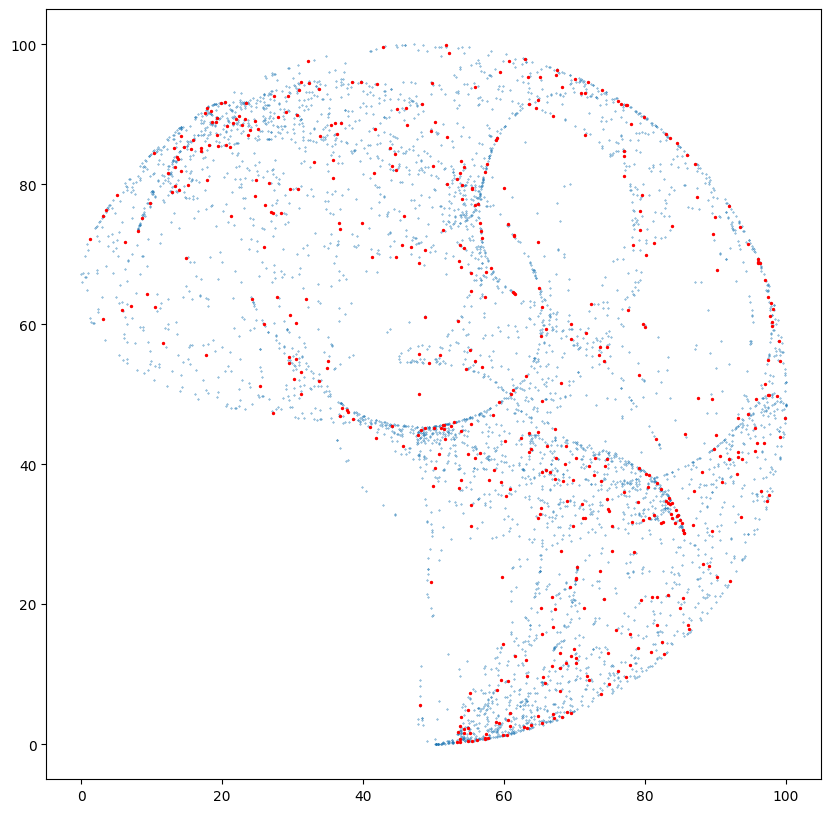

In [134]:
# normalize x and y between 0 and 100
x = (x - np.min(x))/(np.max(x)-np.min(x))*100
y = (y - np.min(y))/(np.max(y)-np.min(y))*100

plt.figure( figsize=(10, 10) , dpi=100)
plt.scatter(x,y, s=0.1)
plt.scatter(x[::10],y[::10], s=2, color='red')
plt.show()

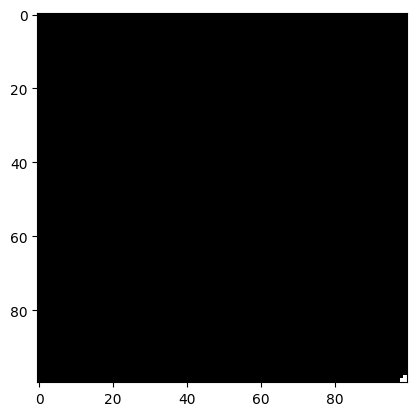

In [128]:
from PIL import Image, ImageDraw
import numpy as np

def create_ball_image(x, y):
    # Image size
    width, height = 100, 100
    
    # Create a new grayscale image
    image = Image.new('L', (width, height), 0)  # 'L' mode for grayscale, 0 for black background
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Ball parameters
    radius = 2
    
    # Calculate the bounding box of the circle
    left_up_point = (x - radius, y - radius)
    right_down_point = (x + radius, y + radius)
    
    # Draw the circle (ball)
    draw.ellipse([left_up_point, right_down_point], fill=255)  # 255 for white color
    
    # Convert the PIL image to a NumPy array
    image_array = np.array(image)
    
    return image_array

# Example usage
x0, y0 = 100, 100  # Center coordinates of the ball
image_array = create_ball_image(x0, y0)
plt.imshow(image_array, cmap='gray')
plt.show() 

In [135]:
frames = None
xs = x[::1]
ys = y[::1]

n_samples = xs.shape[0]

for i in range(n_samples):
    img = create_ball_image(int(xs[i]), int(ys[i])).reshape(1,1,100,100)
    frames = img if frames is None else np.vstack((frames, img))

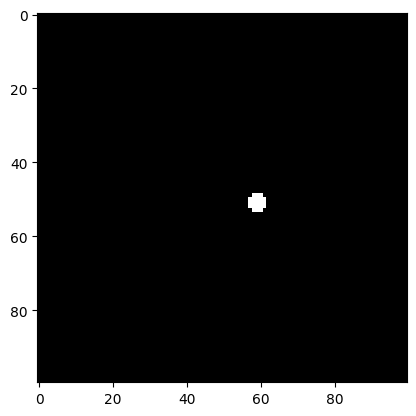

In [117]:
plt.imshow(frames[1000,0], cmap='gray')

(5001, 1, 100, 100)
(5000, 1, 100, 100)
(500, 10, 100, 100)


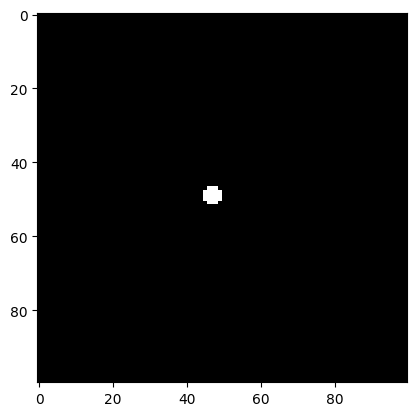

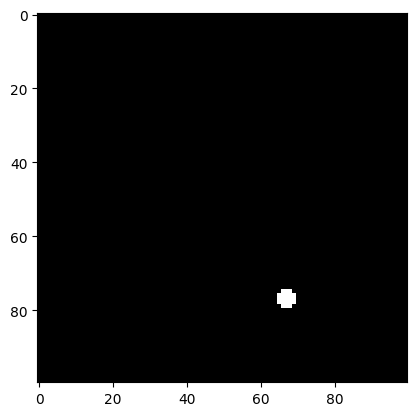

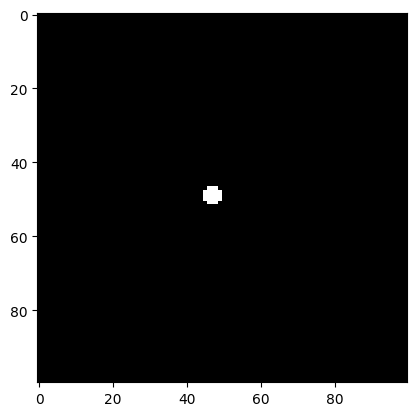

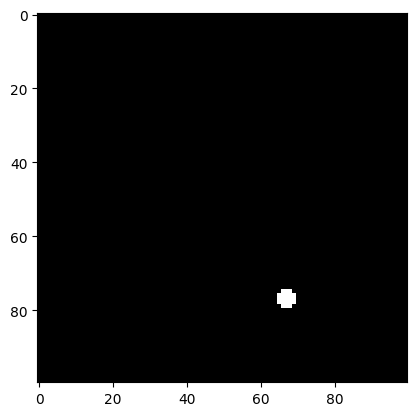

In [137]:
print(frames.shape)

frames_dataset = frames[:-1]
print(frames_dataset.shape)
frames_dataset = frames_dataset.reshape(500,10,100,100)
print(frames_dataset.shape)

plt.imshow(frames_dataset[0,0], cmap='gray')
plt.show()
plt.imshow(frames_dataset[0,1], cmap='gray')
plt.show()

plt.imshow(frames[0,0], cmap='gray')
plt.show()
plt.imshow(frames[1,0], cmap='gray')
plt.show()



In [138]:
np.save("dataset_chaos2", dataset_intensity)

In [118]:
# cretae movie from frames
import cv2
import numpy as np

# Define the codec and create VideoWriter object mp4



fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('chaos.mp4', fourcc, 20.0, (100, 100))

for i in range(frames.shape[0]):
    frame = frames[i,0]
    frame = frame.astype(np.uint8)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    out.write(frame)

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()



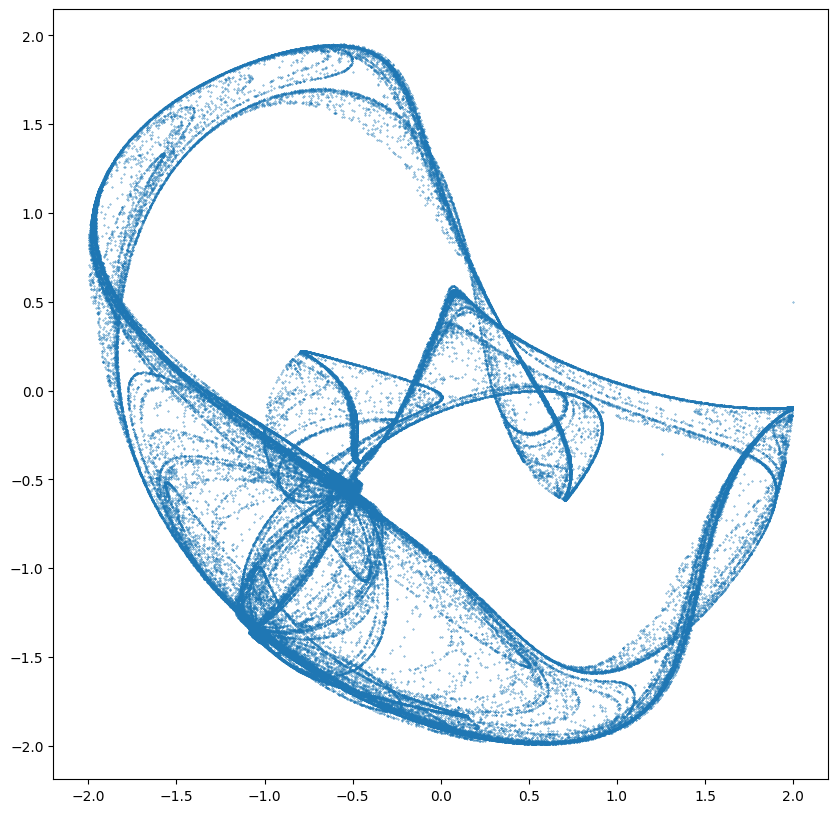

In [85]:
# Peter de Jong  Attractor

a =  0.970
b = -1.899
c = 1.381
d = -1.506

x = 2
y = 0.5

x = [x]
y = [y]

for i in range(100000):
    x.append(np.sin(a*y[i])-np.cos(b*x[i]))
    y.append(np.sin(c*x[i])-np.cos(d*y[i]))

x = np.array(x)
y = np.array(y)

plt.figure( figsize=(10, 10) , dpi=100)
plt.scatter(x,y, s=0.1)
plt.show()

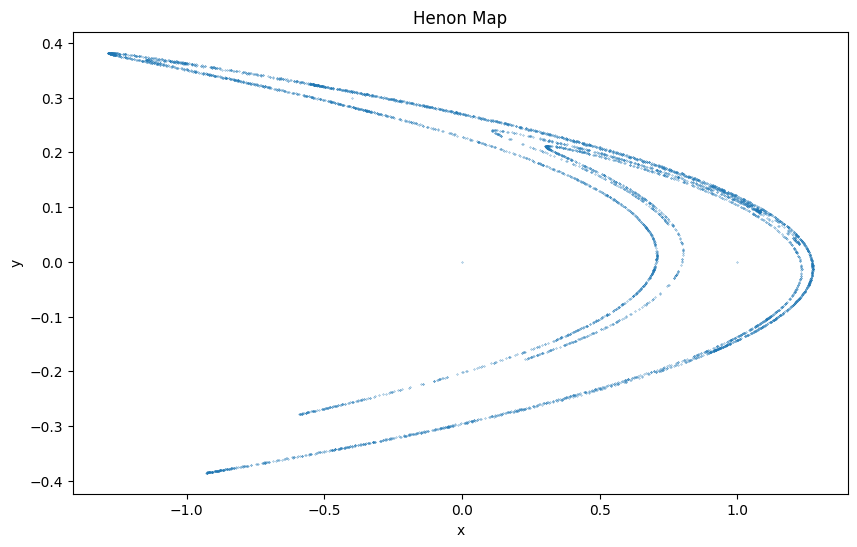

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def henon_map(a, b, x0, y0, num_points):
    x = np.zeros(num_points)
    y = np.zeros(num_points)
    x[0], y[0] = x0, y0
    
    for n in range(1, num_points):
        x[n] = 1 - a * x[n-1]**2 + y[n-1]
        y[n] = b * x[n-1]
        
    return x, y

# Parameters
a = 1.4
b = 0.3
x0, y0 = 0, 0
num_points = 5000

# Generate the Henon map
x, y = henon_map(a, b, x0, y0, num_points)

# Plot the Henon map
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', markersize=0.5)
plt.title('Henon Map')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


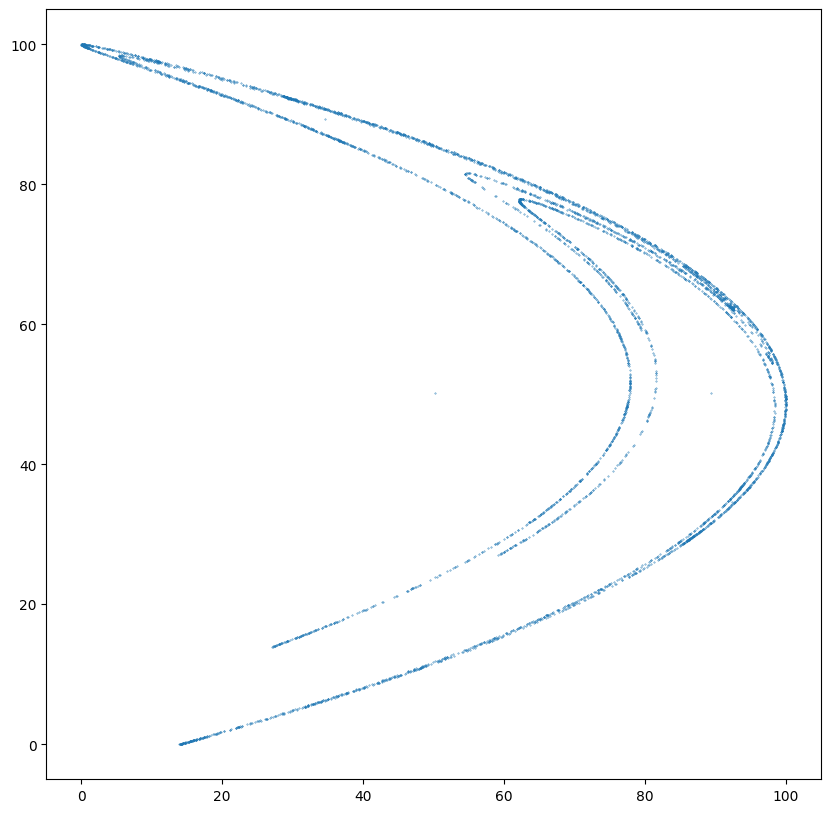

ValueError: cannot reshape array of size 50000 into shape (1,5,1,50,50)

In [143]:
x = (x - np.min(x))/(np.max(x)-np.min(x))*100
y = (y - np.min(y))/(np.max(y)-np.min(y))*100

plt.figure( figsize=(10, 10) , dpi=100)
plt.scatter(x,y, s=0.1)
plt.show()

for i in range(n_samples):
        img = create_ball_image(int(xs[i]), int(ys[i])).reshape(1,1,100,100)
        frames = img if frames is None else np.vstack((frames, img))

dataset_temp = gen_Dataset_npy(frames, sr, 5)

print(frames.shape)

np.save("dataset_"+ dyn +"_1storder", dataset_temp)

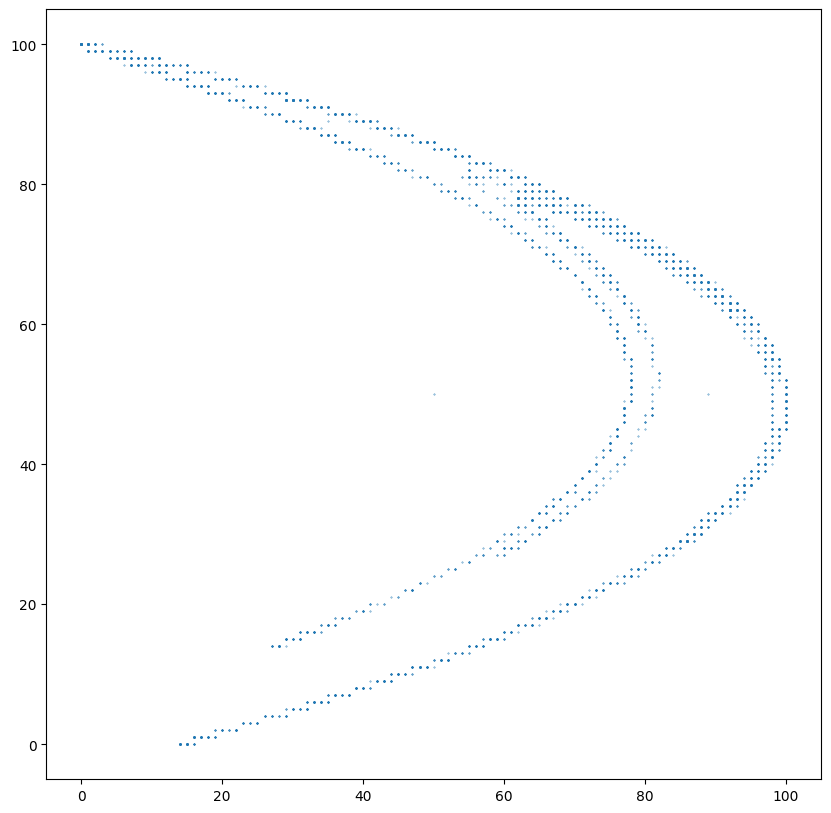

In [146]:
plt.figure( figsize=(10, 10) , dpi=100)
plt.scatter(np.round(x,0),np.round(y,0), s=0.1)
plt.show()
